## **Introduction**

#### A supermarket is a self-service shop offering a wide variety of food, beverages, and household products, organized into sections. This kind of store is larger and has a wider selection than earlier grocery stores but is smaller and more limited in the range of merchandise than a hypermarket or big-box market. In everyday U.S. usage, however, "grocery store" is synonymous with supermarket, and is not used to refer to other types of stores that sell groceries.


## **Problem Statement** : Analyzing Stores sales and their dependence on stores area and daily customer count
#### Is Store Sales dependent on store area and daily customer count?

To answer the above question, we will need to answer further questions like

* Is there a relationship between Store sales, Store area and Daily customer count?
* How many stores do we have based on their size?
* What is the Sales generated from each Store by size?
* What is the average sales vs the store size?
* What is the average sales vs daily customer count?


## **About the data**

- Store ID: (Index) ID of the particular store.
- Store_Area: Physical Area of the store in yard square.
- Items_Available: Number of different items available in the corresponding store.
- DailyCustomerCount: Number of customers who visited stores on average over a month.
- Store_Sales: Sales in (US $) that stores made.

## **Limitations**
#### The dataset primarily focuses on store area(size), allowing us to investigate insights into how factors such as store area and daily customer count influence sales. However, to fully assess the impact of these variables, additional variables like region or store types would enable us understand how store size and customer engagement vary across different regions or store categories, providing a more comprehensive perspective on sales dynamics.

### Importing required libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading the data

In [90]:
df = pd.read_csv("Stores.csv")

# a quick view of 10 random samples in the  data set
df.sample(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
559,560,1237,1512,1070,88210
239,240,1881,2244,920,66030
719,720,1827,2160,930,36160
775,776,1537,1877,660,17670
218,219,1451,1737,890,68430
54,55,1570,1898,980,64090
204,205,1540,1857,1020,58260
356,357,1798,2134,820,72050
645,646,1368,1649,740,63660
259,260,1145,1370,350,38210


## Data Cleaning
The data cleaning process involves
* checking and removing null values
* checking and removing duplicates
* validating if the columns has the correct data types
* stripping column names of whitespaces, replacing white spaces  with underscore, convert column names to lower.
* check for outliers in the dataset

### Checking for null values

In [92]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

##### There are no null values

### Checking for duplicate values

In [4]:
df.duplicated().sum()

0

### Information about the dataset and its data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


### Convert a columns to lowercase and replace space to underscore for ease of access

In [99]:
df.columns = [i.strip().replace(" ","_").lower() for i in df.columns]
df.columns

Index(['store_id', 'store_area', 'items_available', 'daily_customer_count',
       'store_sales'],
      dtype='object')

In [9]:
df.shape

(896, 5)

## A Descriptive statistics of the dataset

In [101]:
df.describe()

,store_id,store_area,items_available,daily_customer_count,store_sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


### Detailed summary of the dataset
* The dataset contains `896` rows and `5` columns. 
* There are no null values in the dataset
* There are no duplicate values in the dataset
* The average store area is 1485.40 yrd square
* The Store has an average daily cusomer count of `786.35` averaging `59351.30` sales daily

### checking for outliers 
We will check for outliers using the boxplot

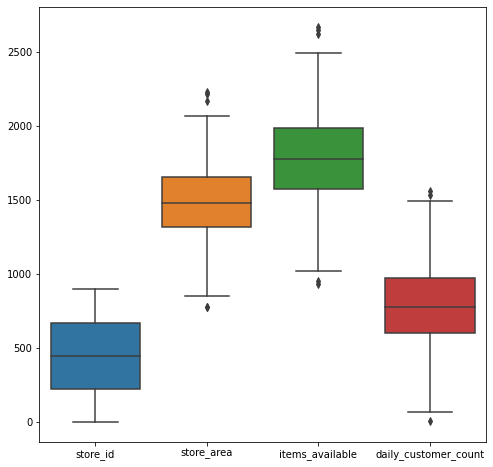

In [111]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(df.drop('store_sales', axis=1))

plt.show()

<AxesSubplot:>

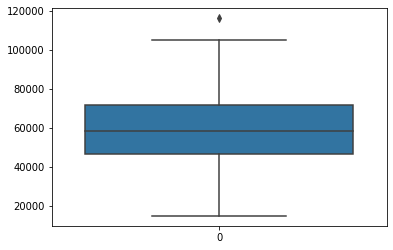

In [113]:
sns.boxplot(df.store_sales)


There are outlier values in our data, but our goal is to understand if Store Sales is dependent on Store Area and Customer Count. For this reason, we will retian the outlier values to enable us understand our data better.

# **Analysis and Visualizations**

## Correlation Analysis

## Is there a relationship between Store sales, Store area and Daily customer count?

Carrying out a correlation analysis will help us to understand if there is a linear correlation between `Store Area, Daily Customer Count and Store Sales`

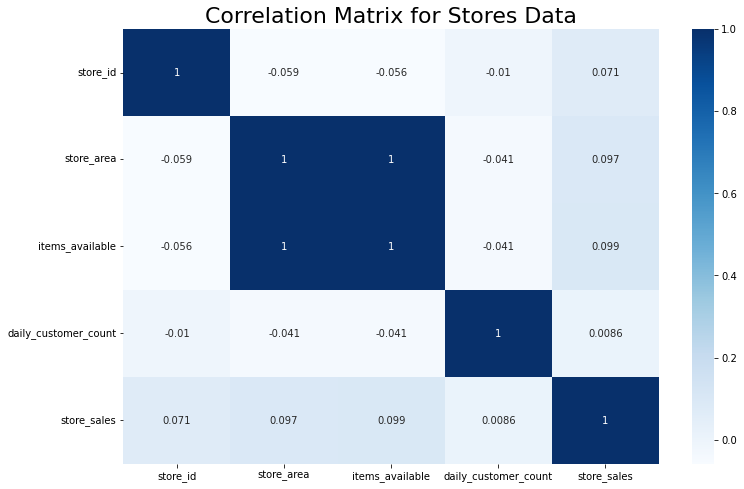

In [119]:
# Setting the figure size
plt.figure(figsize=(12,8))

# Define the correlation plot 
sns.heatmap(df.corr(), annot=True, cmap="Blues")

# title
plt.title('Correlation Matrix for Stores Data', fontsize=22)

# show the plot
plt.show()

### Our discovery from the correlation matrix are listed below
* The above correlation data shows that there is a low linear correlation between the Store Sales, Store Area, and Daily Customer Count.
* Also, there is a very strong positive correlation between Store Area and Items Available at the store. i.e the larger the store, the more the products. This is an expected correlation. 

While there is no linear correlation between the (Store Area, Daily Customer Count and Store Sales). There is a very strong positive correlation between the `Store Area and Items Available`. We will then observe the correlation by using a scatter plot



### Distribution plot
This will display the the distribution of data for each column

/home/dakeshra7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'store_id'}>,
        <AxesSubplot:title={'center':'store_area'}>],
       [<AxesSubplot:title={'center':'items_available'}>,
        <AxesSubplot:title={'center':'daily_customer_count'}>],
       [<AxesSubplot:title={'center':'store_sales'}>, <AxesSubplot:>]],
      dtype=object)

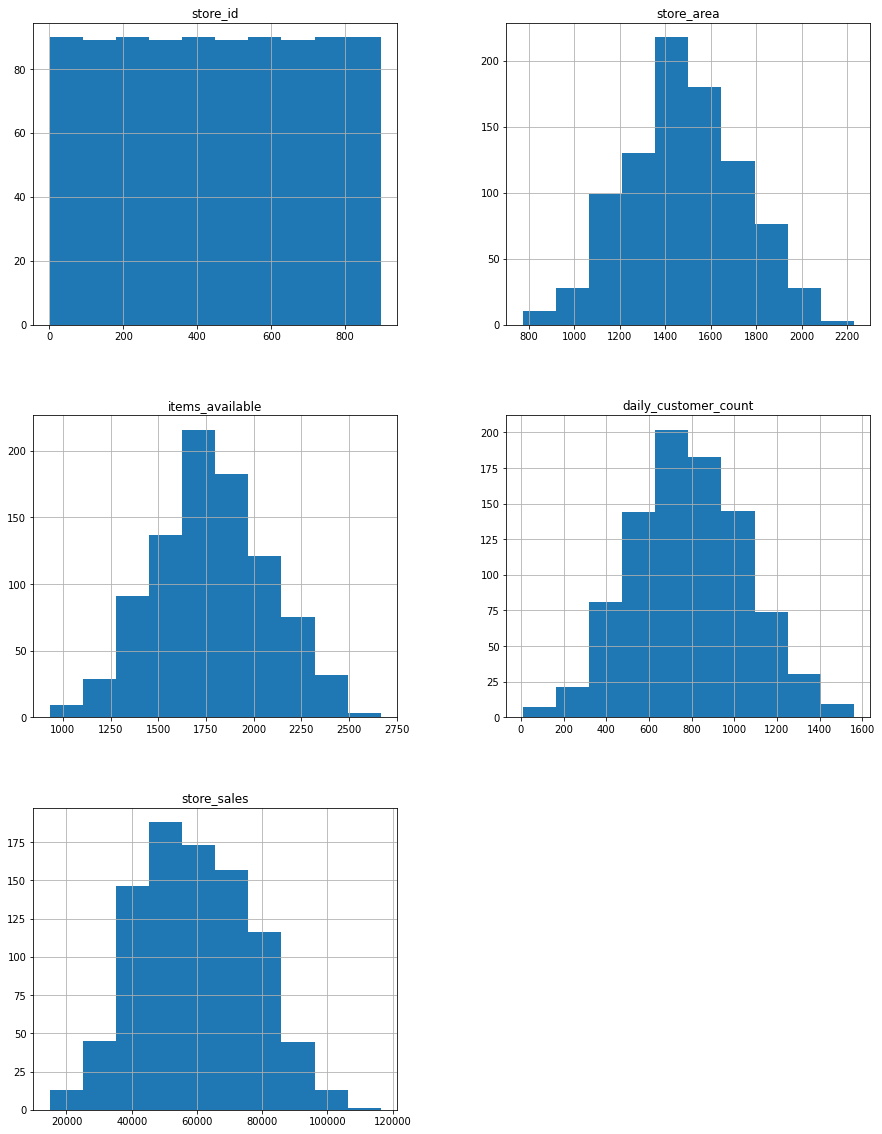

In [155]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

### Next we'll plot the visualisations for the relationships between the variables

## Store Area VS Items AVailable
We want to find out if the number of items avalilable is dependent on the store area

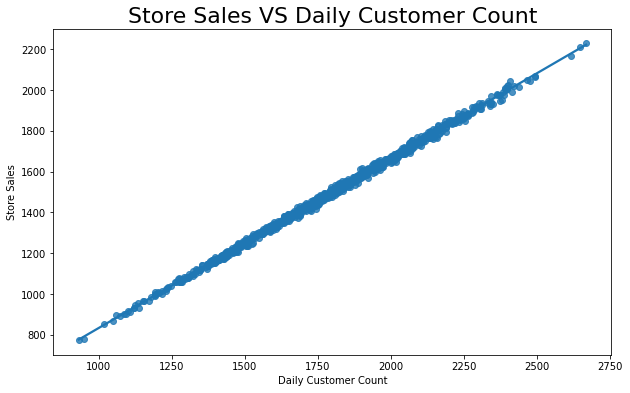

In [146]:
# set figure plot
plt.figure(figsize=(10,6))

# define plot
sns.regplot(x='items_available', y='store_area', data=df)

# set title and axis
plt.title("Store Sales VS Daily Customer Count", fontsize=22)
plt.ylabel("Store Sales")
plt.xlabel("Daily Customer Count")

# show plot
plt.show()

#### This show the strong correlation between Store Area and Items Size. i,e The larger the store the more the items it can accomodate. Now will observe the effect of store area on the sales

#### Although very low, there is a positive correlation between Store Sales and Customer Count.

### Store Sales VS Store Area

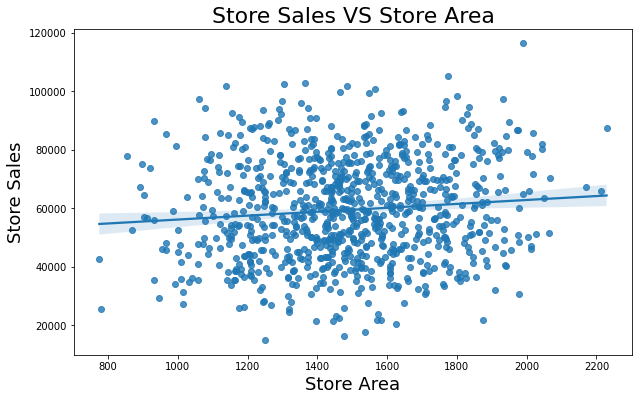

In [126]:
plt.figure(figsize=(10,6))
sns.regplot(x='store_area', y='store_sales', data=df)

# set title and axis
plt.title('Store Sales VS Store Area', fontsize=22)
plt.ylabel("Store Sales", fontsize=18)
plt.xlabel("Store Area", fontsize=18)

# show plot 
plt.show()

####  The scatter plot shows that there is a positive correlation between Store Sales and Store Area.

### Store Sales VS Daily Customer Count


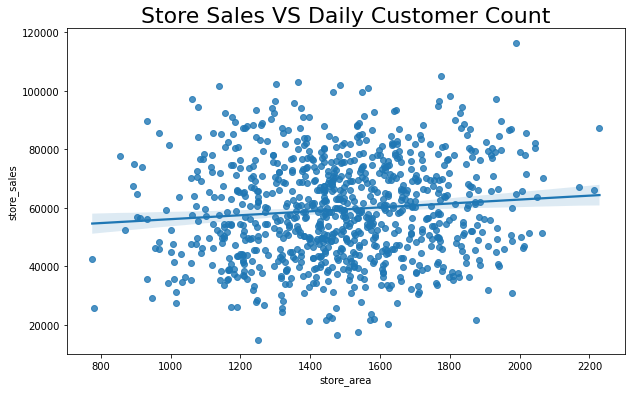

In [121]:
# set figure plot
plt.figure(figsize=(10,6))

# define plot
sns.regplot(x='store_area', y='store_sales', data=df)

# set title and axis
plt.title("Store Sales VS Daily Customer Count", fontsize=22)
plt.ylabel("Store Sales")
plt.xlabel("Daily Customer Count")

# show plot
plt.show()

## **Is Store Sales dependent on stores area and daily customer count?**


### To find out if the Store area or Daily Customer Count do impact Store sales we will breakdown the data and create new columns by doing the following;

* break down the Store Area into size groups based on their size i.e Small, Medium or High
* break down the Daily Customer Count into group size based on their numbers i.e Low, Medium or High

In [139]:
# Create size and customer count groups
df['size_group'] = pd.cut(df['store_area'], bins=[0, 1500, 2000, 2500], labels=['Small', 'Medium', 'Large'])
df['customer_count_group'] = pd.cut(df['daily_customer_count'], bins=[0, 500, 1000, 1560], labels=['Low', 'Medium', 'High'])

# Analyze average sales based on groups
avg_sales_by_size = df.groupby('size_group')['store_sales'].mean()
avg_sales_by_customer_count = df.groupby('customer_count_group')['store_sales'].mean()

# print("Average Sales by Store Size:")
# print(avg_sales_by_size)

# print("\nAverage Sales by Daily Customer Count:")
# print(avg_sales_by_customer_count)


We need to look at a the distribution of values for each size group

### Store By Size
We need to know how many small, medium and large stores we have.

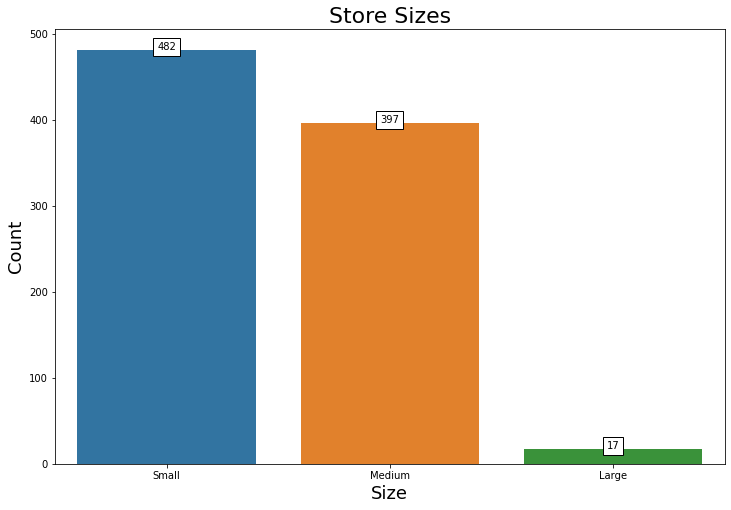

In [206]:
# set figure size
plt.figure(figsize=(12,8))

# define values for x and y aixs
x = df.size_group.value_counts().index
y = df.size_group.value_counts().values

# plot the chart
ax= sns.barplot(x=x, y=y)

# add labels
labels(x,y)

# add title and axis labels
plt.title("Store Sizes", fontsize=22)
plt.xlabel("Size", fontsize=18)
plt.ylabel("Count", fontsize=18)

# display the plot
plt.show()

#### From the above, the large stores are only a tiny percentage of the total store.

### Now we need to take a look at the impact of the Store Area and Daily Customer Count on Store Sales. Firstly, we will plot a bar chart of the store sales and store area

## **Store Sales VS Store Area**


In [141]:
# create function to add labels to bars
def labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center', bbox=dict(facecolor='white'))

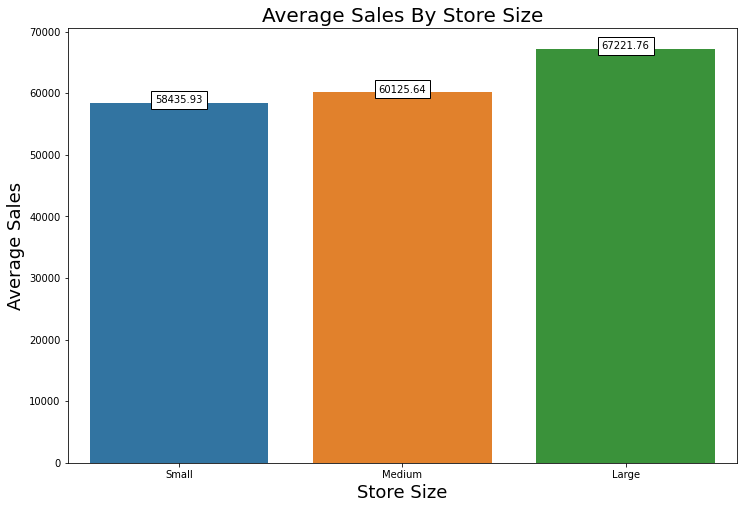

In [201]:
# set plot size
plt.figure(figsize=(12,8))

#define the plot
sns.barplot(x=avg_sales_by_size.index, y=avg_sales_by_size.values, data=df)

# add labels
labels(avg_sales_by_size.index, np.round(avg_sales_by_size.values,2))
# set chart title and axis label
plt.title("Average Sales By Store Size", fontsize=20)
plt.xlabel("Store Size", fontsize=18)
plt.ylabel("Average Sales", fontsize=18)
# plt.plot(avg_sales_by_customer_count)
plt.show()

#### The above chart shows the average sales increase ast the Store Area increases. This is an indication that Larger stores tend to rake in more Sales than the smaller Stores. So, we can infer that the Store Sales is dependent on Store Area

# Store Sales VS Daily Customer Count

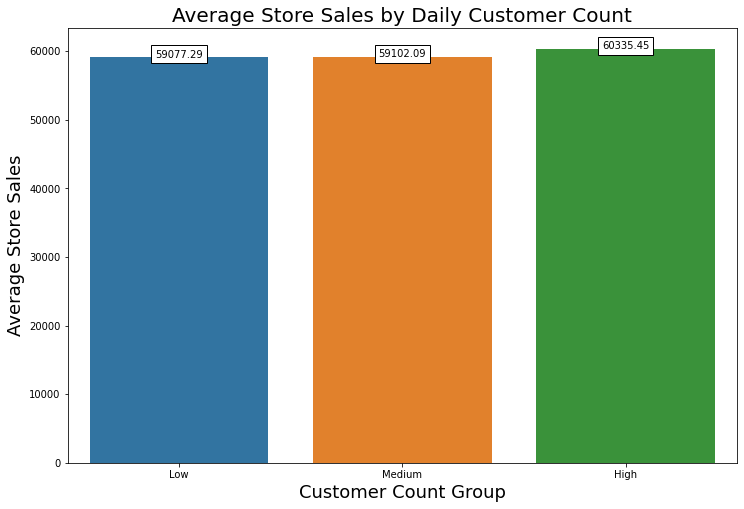

In [85]:
# set plot chart
plt.figure(figsize=(12,8))

# set the chart
sns.barplot(x=avg_sales_by_customer_count.index, y=avg_sales_by_customer_count.values, data=df)

# add labels to the char
labels(avg_sales_by_customer_count.index, np.round(avg_sales_by_customer_count.values,2))

# set chart title and axis labels
plt.title("Average Store Sales by Daily Customer Count", fontsize=20)
plt.xlabel("Customer Count Group", fontsize=18)
plt.ylabel('Average Store Sales', fontsize=18)

# display the plot
plt.show()

#### The above Chart also shows the avearage Sales increasing as the customer Count group increases when we have a high Daily Customer Count, there is increase the Store Sales. 

In [157]:
df.size_group.value_counts()

Small     482
Medium    397
Large      17
Name: size_group, dtype: int64

## Conclusion 
Despite constituting only 2% of the total store count by area, large stores remarkably outperformed both medium and small stores in terms of sales. This observation points to a significant dependence of store sales on factors such as store size and daily customer count. The data strongly suggests that an increase in the number of large stores is likely to contribute to a substantial boost in overall store sales, emphasizing the pivotal role of store size in driving profitability within the supermarket chain.






## Recommendations
Based on out above analysis, here are a few recommendations for the store.

* Optimize Store Layouts: For large stores that are generating higher sales, consider optimizing the layout to enhance customer experience, highlight popular products, and encourage additional purchases.

* Allocate Resources Wisely: Allocate resources strategically by investing more in larger stores where the potential for increased sales is evident. This may include targeted marketing campaigns, staff training, and inventory management.

* Customer Engagement Strategies: Implement customer engagement strategies to attract and retain daily customers. This could involve loyalty programs, personalized promotions, or enhancing in-store experiences to encourage repeat visits.

* Expansion Planning: If feasible, consider expanding the number of large stores in regions with high customer count. Prioritize stores where the data indicates a positive correlation between store size and sales.

* Market Research for New Stores: Before opening new stores, conduct thorough market research to identify the optimal store size based on the local demographics and customer preferences. This can help align the new store with the anticipated demand.


In addition to the above, it is important to establish a feedback mechanism to collect insights from customers about their shopping experiences and to use this feedback to make decisions on improvements and innovations that can further boost sales.